In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import random
import nltk
import os

from wordcloud import WordCloud
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# nltk.download("stopwords")


## Préparer les données pour la corrélation

In [43]:
df = pd.read_csv("../data/commentaires.csv")
fichier_csv = "../data/commentaires.csv"

df["longueur"] = df["text"].apply(lambda x: len(x.split()))

moyenne_longueurs = df["longueur"].mean()

print("La moyenne de la longueur des commentaires dans le fichier CSV est de :", moyenne_longueurs)

La moyenne de la longueur des commentaires dans le fichier CSV est de : 22.982142857142858


In [44]:
longueurs_sup_moyenne = df[df["longueur"] > moyenne_longueurs]["longueur"]

colere = df[df["label"] == 3]["longueur"]

longueur_min = min(len(longueurs_sup_moyenne), len(colere))
longueurs_sup_moyenne = longueurs_sup_moyenne.head(longueur_min)
colere = colere.head(longueur_min)

correlation, p_value = pearsonr(longueurs_sup_moyenne, colere)

print("La corrélation entre les longueurs supérieures à la moyenne et la colère :", correlation)
print("La p-value de la corrélation est de :", p_value)

La corrélation entre les longueurs supérieures à la moyenne et la colère : 0.1954935283723542
La p-value de la corrélation est de : 0.5883300555779563


## Initialisation des variables qui sont communes pour tout les graphiques

In [45]:
plt.figure(figsize=(10, 6))

label_mapping = {
    0 : "tristesse",
    1 : "joie",
    2 : "amour",
    3 : "colère",
    4 : "peur",
    5 : "surprise"
}
df["emotion"] = df["label"].map(label_mapping)
df["longeur"] = df["text"].apply(lambda x: len(x.split()))

<Figure size 1000x600 with 0 Axes>

In [46]:
dossier = "../figures"
os.makedirs(dossier, exist_ok=True)

## Statistiques générales

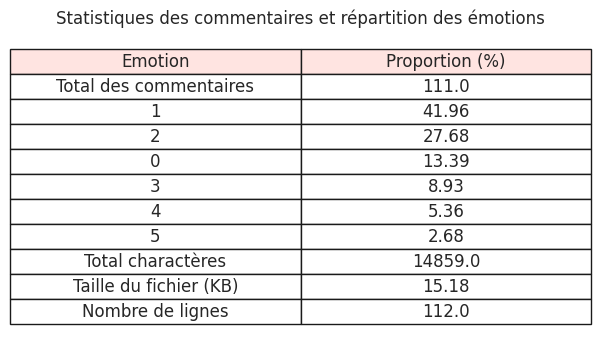

In [47]:
total_comments = len(df) - 1
emotion_distribution = df["label"].value_counts(normalize=True) * 100
emotion_distribution = emotion_distribution.round(2)

df['text_length'] = df['text'].str.len()
total_characters = int(df['text_length'].sum())

taille_fichier = os.path.getsize(fichier_csv)
taille_fichier_kb = round(taille_fichier / 1024, 2)

nombre_lignes = len(df)

stats_df = pd.DataFrame({
    "Emotion": emotion_distribution.index,
    "Proportion (%)": emotion_distribution.values
})

stats_df = pd.concat([
    pd.DataFrame({"Emotion": ["Total des commentaires"], "Proportion (%)": [total_comments]}),
    stats_df,
    pd.DataFrame({"Emotion": ["Total charactères"], "Proportion (%)": [total_characters]}),
    pd.DataFrame({"Emotion": ["Taille du fichier (KB)"], "Proportion (%)": [taille_fichier_kb]}),
    pd.DataFrame({"Emotion": ["Nombre de lignes"], "Proportion (%)": [nombre_lignes]})
], ignore_index=True)

sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
table = plt.table(cellText=stats_df.values, colLabels=stats_df.columns, cellLoc="center", loc="center", colColours=["#FFE4E1", "#FFE4E1"])
table.auto_set_font_size(True)
table.scale(1.5, 1.5)
plt.axis("off")
plt.title("Statistiques des commentaires et répartition des émotions")
plt.savefig(os.path.join(dossier, "statistiques_generales.png"))
plt.show()

## Plan sur la corrélation entre la longueur des commentaires et la colère

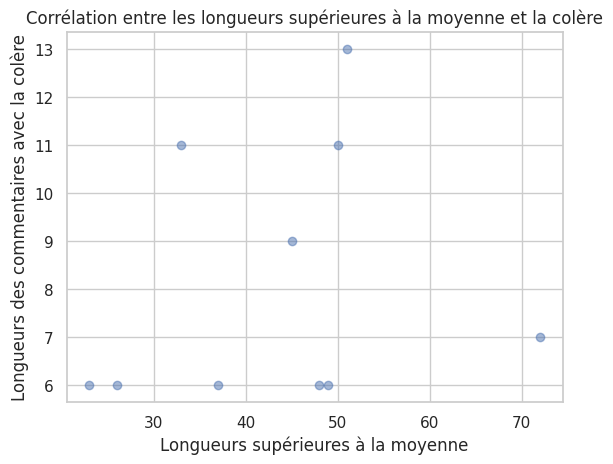

In [48]:
plt.scatter(longueurs_sup_moyenne, colere, alpha=0.5)
plt.title("Corrélation entre les longueurs supérieures à la moyenne et la colère")
plt.xlabel("Longueurs supérieures à la moyenne")
plt.ylabel("Longueurs des commentaires avec la colère")
plt.grid(True)
plt.savefig(os.path.join(dossier, "correlation_longueurs_colere.png"))
plt.show()

## Comparaison de la corrélation

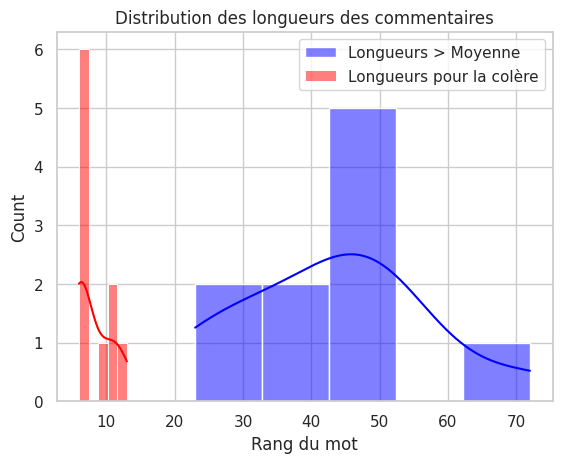

In [49]:
sns.histplot(longueurs_sup_moyenne, color="blue", label="Longueurs > Moyenne", kde=True)
sns.histplot(colere, color="red", label="Longueurs pour la colère", kde=True)
plt.title("Distribution des longueurs des commentaires")
plt.xlabel("Longueur des commentaires")
plt.legend()
plt.xlabel("Rang du mot")
plt.savefig(os.path.join(dossier, "distribution_longueurs_comparatif.png"))
plt.show()

## Matrice de corrélation

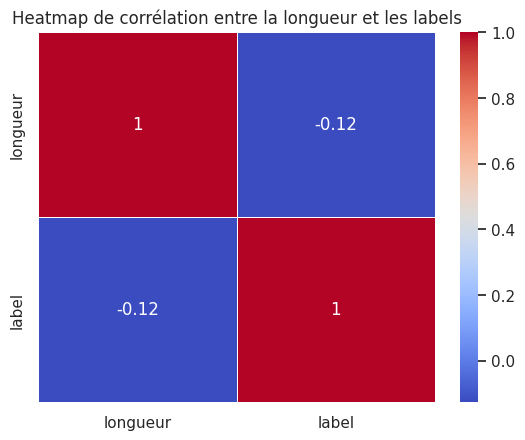

In [50]:
corr_matrix = df[["longueur", "label"]].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de corrélation entre la longueur et les labels")
plt.savefig(os.path.join(dossier, "matrice_correlation_longueur_labels.png"))
plt.show()

## Distribution de la longueur en fonction de l'émotion

/tmp/ipykernel_118951/1282644568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="emotion", y="longueur", data=df, palette=couleur)
/tmp/ipykernel_118951/1282644568.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(x="emotion", y="longueur", data=df, palette=couleur)


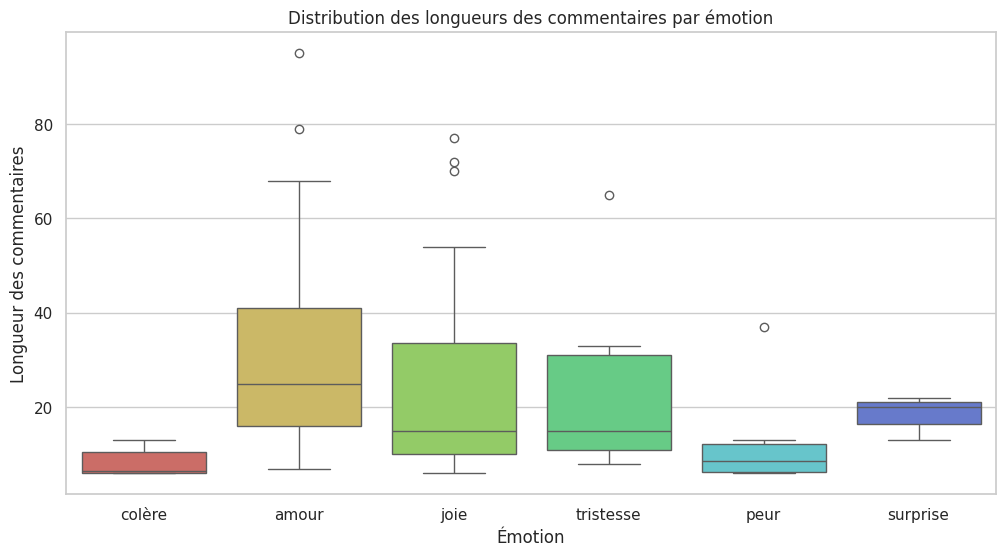

In [51]:
couleur = sns.color_palette("hls", 8)

plt.figure(figsize=(12, 6))
sns.boxplot(x="emotion", y="longueur", data=df, palette=couleur)
plt.title("Distribution des longueurs des commentaires par émotion")
plt.xlabel("Émotion")
plt.ylabel("Longueur des commentaires")
plt.savefig(os.path.join(dossier, "distribution_longueurs_par_emotion.png"))
plt.show()

## Distribution de la longueur des commentaires en fonction de l'émotion (Violin Plot)

/tmp/ipykernel_118951/36147960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="emotion", y="longeur", data=df, palette=couleur)
/tmp/ipykernel_118951/36147960.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.violinplot(x="emotion", y="longeur", data=df, palette=couleur)


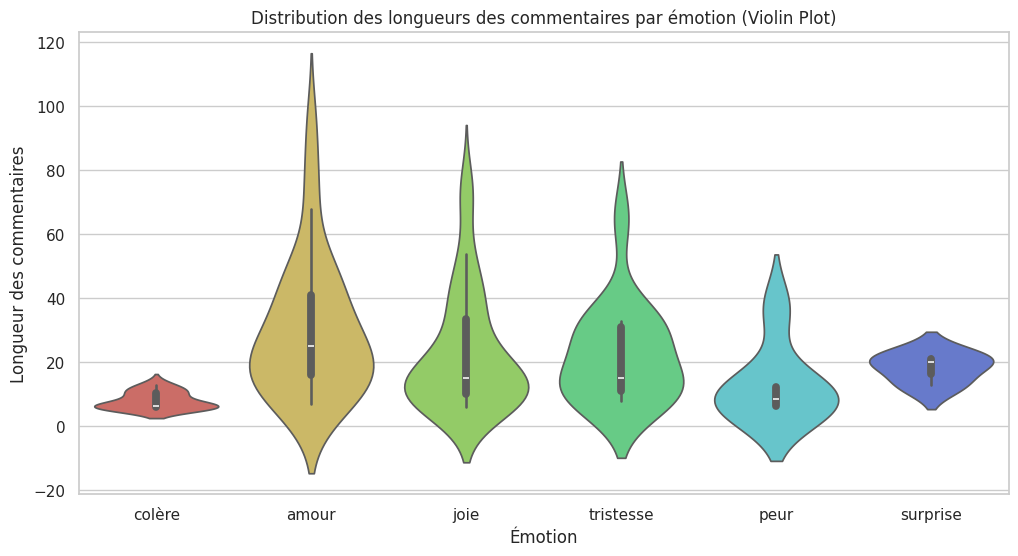

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="emotion", y="longeur", data=df, palette=couleur)
plt.title("Distribution des longueurs des commentaires par émotion (Violin Plot)")
plt.xlabel("Émotion")
plt.ylabel("Longueur des commentaires")
plt.savefig(os.path.join(dossier, "distribution_longueurs_par_emotion_violin.png"))
plt.show()

## Pair plot
Visualisation des données qui permet d'examiner les relations entre plusieurs paires de variables.

<Figure size 100x100 with 0 Axes>

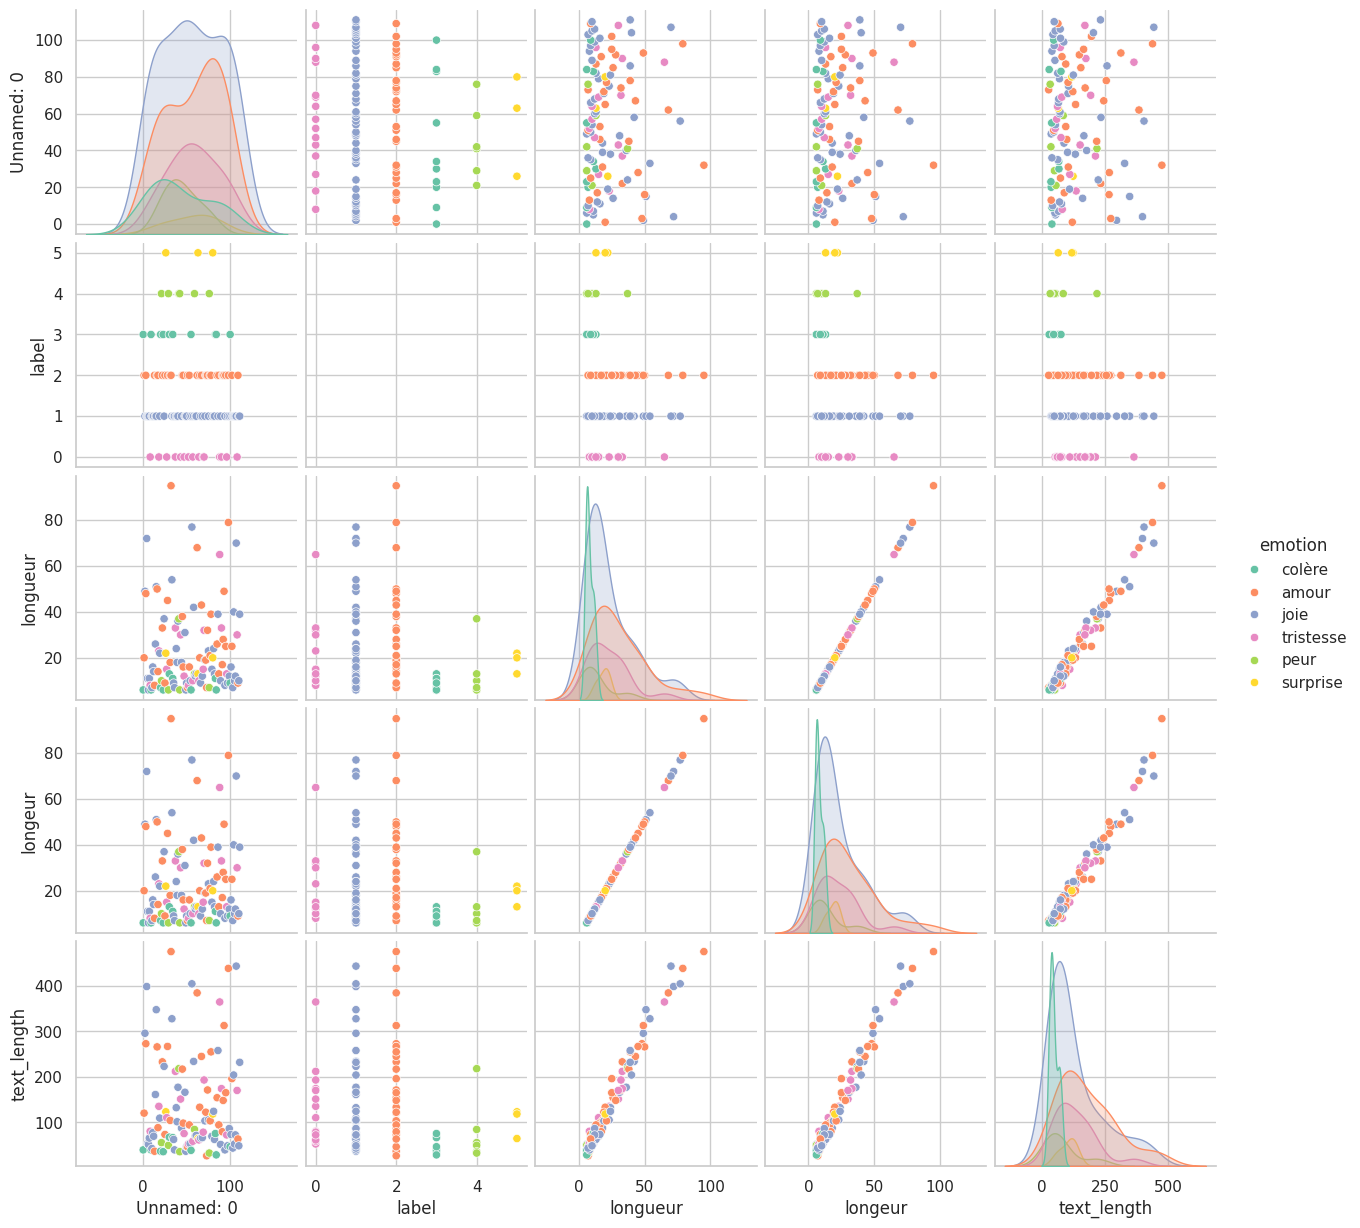

In [53]:
plt.figure(figsize=(1, 1))
sns.pairplot(df, hue="emotion", palette="Set2", height=2.5)
plt.savefig(os.path.join(dossier, "pair_plot_commentaires.png"))
plt.show()

## Diagramme répartition des sentiments


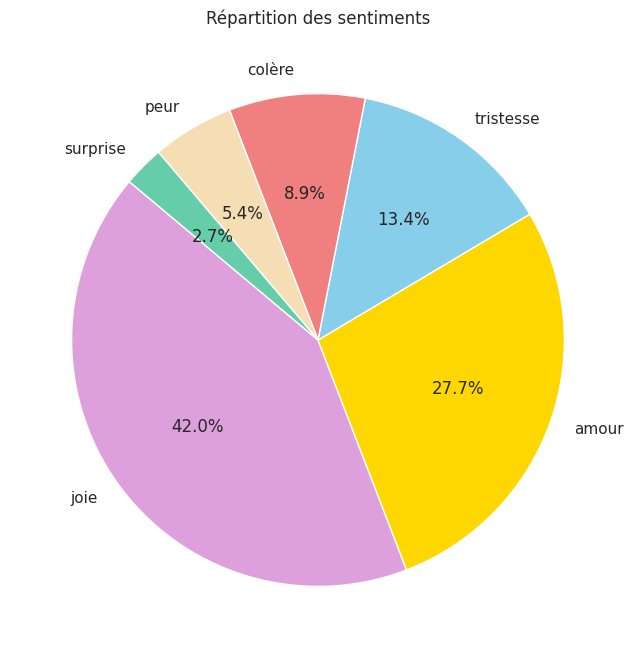

In [54]:
sentiment_couleurs = {
    "tristesse": "skyblue",
    "joie": "plum",
    "amour": "gold",
    "colère": "lightcoral",
    "peur": "wheat",
    "surprise": "mediumaquamarine"
}

sentiment_counts = df["emotion"].value_counts()

sentiments = list(sentiment_counts.index)
counts = list(sentiment_counts.values)
couleurs = [sentiment_couleurs[sentiment] for sentiment in sentiments]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=sentiments, colors=couleurs, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des sentiments")
plt.savefig("../figures/repartition_sentiments.png")
plt.show()


## Graphique en barre du nombre d'occurrences

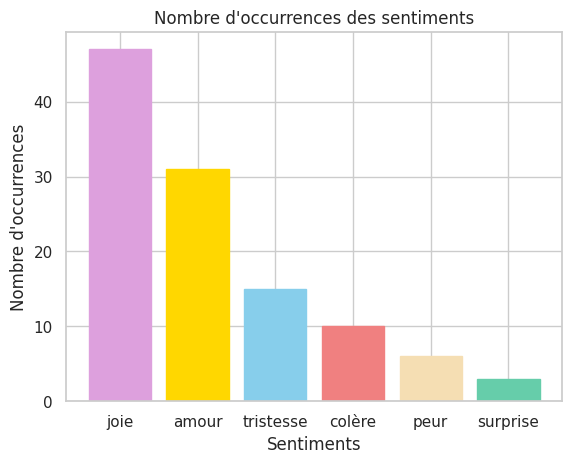

In [55]:
bars = plt.bar(sentiments, counts)
for i, bar in enumerate(bars):
    bar.set_color(couleurs[i])
plt.title("Nombre d'occurrences des sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Nombre d'occurrences")
plt.savefig(os.path.join(dossier, "nombre_occurrences_sentiments.png"))
plt.show()

## Nuage de mot des commentaires

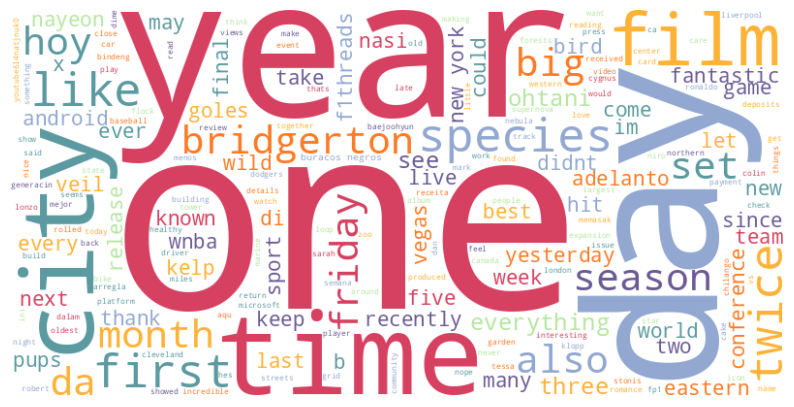

In [56]:
couleurs = ["#ff7b25", "#d64161", "#feb236", "#6b5b95", "#b5e7a0", "#5b9aa0", "#92a8d1"]

def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(couleurs)

stop_words_en = set(stopwords.words("english"))
stop_words_fr = set(stopwords.words("french"))
stop_words_es = set(stopwords.words("spanish"))
stop_words_v0 = stop_words_fr.union(stop_words_es)
stop_words = stop_words_v0.union(stop_words_en)

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words, color_func=random_color_func).generate(" ".join(df["text"]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig(os.path.join(dossier, "wordcloud_commentaires.png"))
plt.axis("off")
plt.show()

## Distributon de la longueur de chaque commentaires

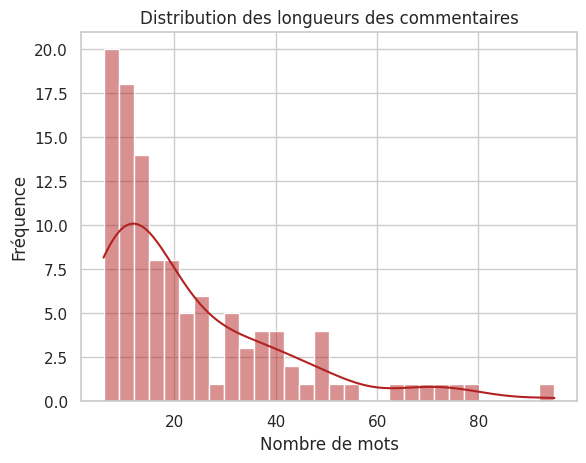

In [57]:
sns.histplot(df["longueur"], bins=30, kde=True, color="firebrick")
plt.title("Distribution des longueurs des commentaires")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.savefig(os.path.join(dossier, "distribution_longueurs_commentaires.png"))
plt.show()

## Loi de Zipf
La loi de Zipf calcule la fréquence des mots dans les commentaires.

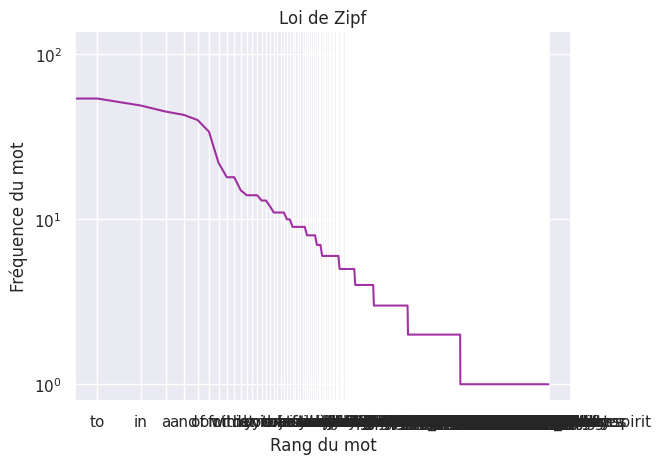

In [58]:
total_mots = df["text"].str.split(expand=True).stack().value_counts()

sns.set()
plt.loglog(total_mots.index, total_mots.values, alpha=.8, color="darkmagenta")
plt.title("Loi de Zipf")
plt.xlabel("Rang du mot")
plt.ylabel("Fréquence du mot")
plt.savefig(os.path.join(dossier, "loi_de_zipf.png"))
plt.show()

## Le train test split

In [59]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv("../data/commentaires_train.csv", index=False)
test_df.to_csv("../data/commentaires_test.csv", index=False)

print(f"Nombre total de commentaires : {len(df)}")
print(f"Nombre de commentaires dans l'ensemble d'entraînement : {len(train_df)}")
print(f"Nombre de commentaires dans l'ensemble de test : {len(test_df)}")

print("\nDistribution des labels dans l'ensemble d'entraînement :")
print(train_df["label"].value_counts(normalize=True) * 100)

print("\nDistribution des labels dans l'ensemble de test :")
print(test_df["label"].value_counts(normalize=True) * 100)

Nombre total de commentaires : 112
Nombre de commentaires dans l'ensemble d'entraînement : 89
Nombre de commentaires dans l'ensemble de test : 23

Distribution des labels dans l'ensemble d'entraînement :
label
1    41.573034
2    29.213483
0    13.483146
3     8.988764
4     5.617978
5     1.123596
Name: proportion, dtype: float64

Distribution des labels dans l'ensemble de test :
label
1    43.478261
2    21.739130
0    13.043478
5     8.695652
3     8.695652
4     4.347826
Name: proportion, dtype: float64
